# Read Directly from IIASA Data Resources

IIASA's new [scenario explorer](https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/workspaces) is not only a great resource on its own, but it also allows the underlying datasets to be directly queried. `pyam`  takes advantage of this ability to allow you to easily pull data and work with it.

In [1]:
import pyam
from pyam.iiasa import valid_connection_names

<IPython.core.display.Javascript object>

There are currently not many available data sources, but more will be added with time

In [2]:
valid_connection_names()

['sr15']

In this example, we will be pulling data from the Special Report on 1.5C explorer. This can be done in a number of ways, for example

```
pyam.read_iiasa('iamc15')
pyam.read_iiasa_iamc15()
```

However, this would pull all available data. It is also possible to query specific subsets of data in a manner similar to `pyam.IamDataFrame.filter()`. We'll do that to keep it manageable.

In [3]:
df = pyam.read_iiasa_iamc15(
    model='MESSAGEix*', 
    variable=['Emissions|CO2', 'Primary Energy|Coal'], 
    region='World'
)

INFO:root:You are connected to the sr15 database. Please cite as:

Huppmann, D., Rogelj, J., Kriegler, E., Krey, V., & Riahi, K. (2018). A new scenario resource for integrated 1.5° C research. Nature Climate Change, 2018, DOI: 10.1038/s41558-018-0317-4


Here we pulled out all results for model(s) that start with 'MESSAGEix' that are in the 'World' region and associated with the two named variables.

Let's plot CO2 emissions.

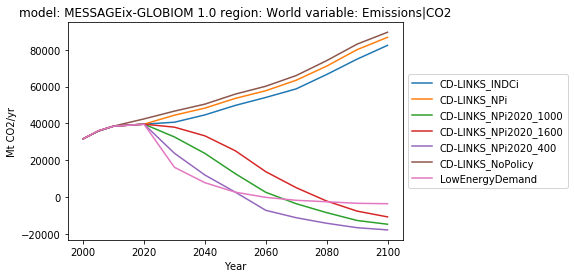

In [4]:
ax = df.filter(variable='Emissions|CO2').line_plot(
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

And now continue doing all of your analysis!

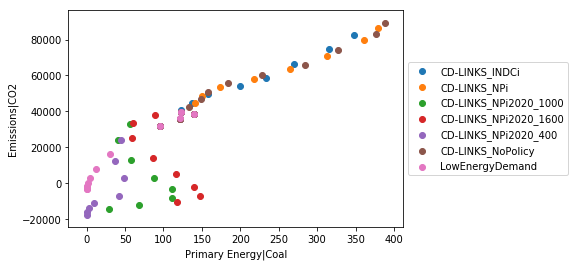

In [5]:
ax = df.scatter(
    x='Primary Energy|Coal', 
    y='Emissions|CO2', 
    color='scenario',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

## Exploring the Data Source

If you're interested in what data is actually in the data source, you can use `pyam.iiasa.Connection` to do so.

In [6]:
conn = pyam.iiasa.Connection('sr15')

INFO:root:You are connected to the sr15 database. Please cite as:

Huppmann, D., Rogelj, J., Kriegler, E., Krey, V., & Riahi, K. (2018). A new scenario resource for integrated 1.5° C research. Nature Climate Change, 2018, DOI: 10.1038/s41558-018-0317-4


The `conn` object has a number of useful functions for listing what's in the dataset. A few of them are shown below.

In [7]:
conn.models().head()

0        AIM/CGE 2.0
1        AIM/CGE 2.1
2      C-ROADS-5.005
3           GCAM 4.2
4    GENeSYS-MOD 1.0
Name: model, dtype: object

In [8]:
conn.scenarios().head()

0    ADVANCE_2020_1.5C-2100
1        ADVANCE_2020_Med2C
2         ADVANCE_2020_WB2C
3        ADVANCE_2030_Med2C
4    ADVANCE_2030_Price1.5C
Name: scenario, dtype: object

In [9]:
conn.variables().head()

0    AR5 climate diagnostics|Concentration|CO2|FAIR...
1    AR5 climate diagnostics|Concentration|CO2|MAGI...
2    AR5 climate diagnostics|Forcing|Aerosol|Direct...
3    AR5 climate diagnostics|Forcing|Aerosol|MAGICC...
4    AR5 climate diagnostics|Forcing|Aerosol|Total|...
Name: variable, dtype: object

In [10]:
conn.regions().head()

0          World
1         R5ASIA
2          R5LAM
3          R5MAF
4    R5OECD90+EU
Name: region, dtype: object

You can directly query the the `conn`, which will give you a `pd.DataFrame`

In [11]:
df = conn.query(
    model='MESSAGEix*', 
    variable=['Emissions|CO2', 'Primary Energy|Coal'], 
    region='World'
)
df.head()

,model,region,runId,scenario,time,unit,value,variable,version,year
0,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,31667.90819,Emissions|CO2,1,2000
1,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,35933.06970,Emissions|CO2,1,2005
2,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,38542.01816,Emissions|CO2,1,2010
3,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,39615.22255,Emissions|CO2,1,2020
4,MESSAGEix-GLOBIOM 1.0,World,238,CD-LINKS_INDCi,-1,Mt CO2/yr,40671.28065,Emissions|CO2,1,2030


And you can easily turn this into a `pyam.IamDataFrame` to continue your analysis.

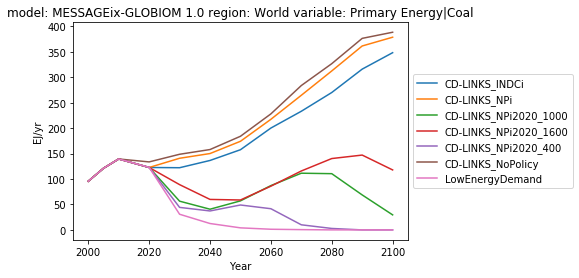

In [12]:
df = pyam.IamDataFrame(df)
ax = df.filter(variable='Primary Energy|Coal').line_plot(
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)